Highest Test Accuracy

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(image_train, label_train), (image_test, label_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
print(image_train.shape) #Values: ([0-255]pixel value, for x-value, for y-value, for r g and b)
print(image_test.shape)

print(label_train.shape) #Values: ([1-10], this second place in array only has one possible value, therefore it doesn't really matter)
print(label_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
print(image_train[0, 0, 0]) #all three RGB values for a single pixel

[59 62 63]


In [4]:
print(label_train[0]) #The category that image 1 falls under

[6]


In [5]:
label_train_cat = tf.keras.utils.to_categorical(label_train,10)
label_test_cat = tf.keras.utils.to_categorical(label_test, 10)
image_train = image_train / 255.
image_test = image_test / 255.

In [6]:
#The categorized Label Values for test and train data
print(label_train_cat[0])
print(label_test_cat[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
#The new pixel values for test and train image
print(image_train[0,0,0])
print(image_test[0,0,0])

[0.23137255 0.24313725 0.24705882]
[0.61960784 0.43921569 0.19215686]


In [8]:
model = keras.models.Sequential()
model.add(keras.Input(shape = (32,32,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3000, activation = 'relu'))
model.add(keras.layers.Dense(1000, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(image_train, label_train_cat, validation_split=.1, epochs = 3)

Epoch 1/3
1407/1407 [==============================] - 15s 8ms/step - loss: 1.9123 - accuracy: 0.3218 - val_loss: 1.7622 - val_accuracy: 0.3736
Epoch 2/3
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6707 - accuracy: 0.4006 - val_loss: 1.6324 - val_accuracy: 0.4262
Epoch 3/3
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5893 - accuracy: 0.4317 - val_loss: 1.5594 - val_accuracy: 0.4444


In [10]:
model.evaluate(image_test, label_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 1.5466 - accuracy: 0.4498


[1.546579360961914, 0.4498000144958496]

Accuracy of Simple Neural Network is not great. Can use a Convolutional Neural Network to increase train and test accuracy.

In [70]:
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
     
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.15),
     
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()
model.compile(optimizer='adam',  loss='categorical_crossentropy', metrics='accuracy')

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
flatten_22 (Flatten)         (None, 7744)            

In [71]:
history = model.fit(image_train, label_train_cat, epochs = 6, validation_data=(image_test, label_test_cat))

Epoch 1/6
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4790 - accuracy: 0.4618 - val_loss: 1.1635 - val_accuracy: 0.5818
Epoch 2/6
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0911 - accuracy: 0.6098 - val_loss: 0.9599 - val_accuracy: 0.6615
Epoch 3/6
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9369 - accuracy: 0.6677 - val_loss: 0.9284 - val_accuracy: 0.6784
Epoch 4/6
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8480 - accuracy: 0.7008 - val_loss: 0.8038 - val_accuracy: 0.7212
Epoch 5/6
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7750 - accuracy: 0.7270 - val_loss: 0.8485 - val_accuracy: 0.7038
Epoch 6/6
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7299 - accuracy: 0.7412 - val_loss: 0.7502 - val_accuracy: 0.7410


313/313 - 2s - loss: 0.7502 - accuracy: 0.7410
[0.7501761317253113, 0.7409999966621399]


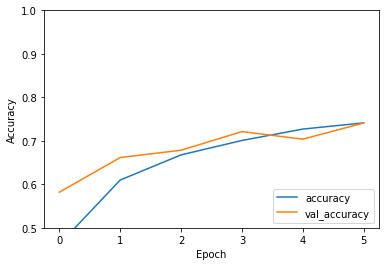

In [79]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [84]:
test_loss, test_acc = model.evaluate(image_test, label_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.7502 - accuracy: 0.7410


In [85]:
print(test_acc)

0.7409999966621399
